### Author: Patricia Skowronek, Max-Planck-Institute of Biochemistry

!pip install matplotlib_venn==0.11.10
!pip install upsetplot==0.9.0
!pip install seaborn==0.12.2
!pip install plotly==5.20.0
!pip install datashader==0.15.2
!pip install --upgrade nbformat==5.10.3

!pip install -U kaleido

In [1]:
# import AB_tests_mutipleRuns_2 as AB_tests
import AB_tests_mutipleRuns as AB_tests

import pandas as pd
import numpy as np

from upsetplot import plot as upset_plot
from matplotlib_venn import venn3
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16.5})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
# This script requires its data in a pivot tables

# Only important for MaxQuant:
# Make sure that you called the individual experiments by the same name but different numbers such as: 
# run1, run2, run3, run4 or no_tims1, no_tims2, no_tims3, no_tims4

# # Spec_DIANN_alphaDia_prec
sample_A = "/Users/patriciaskowronek/Documents/pydiaid/nbs/DIANN_optimal_dia-PASEF_lib-based.pg_matrix.tsv"
sample_B = "/Users/patriciaskowronek/Documents/pydiaid/nbs/pG_20240723_143250_optimal_diaP_lib_Report.tsv"
label_A = "DIANN"
label_B = "Spec"
save_output_here = "/Users/patriciaskowronek/Documents/test_folder"
file_names = [sample_A, sample_B]
labels = [label_A, label_B] # important all names have to be different
# # filter_columns = ["100_75_25", "100_50_50"] #define filter_columns if you have two types of experiments within one analysis and you want to filter for one or both of them. For instance, 1) '20240713_OA4_Neo1_15min_PaSk_SA_HYE_100_75_25_05' 2) '20240713_OA4_Neo1_15min_PaSk_SA_HYE_100_50_50_03' -> filter_columns 

percentage_of_missing_values = 0.25

# You should not have to change anything down here :)

list_dfs_only_with_intensity_columns = list()
list_dfs = list()
dict_results = dict()
dict_results["totalIDs"] = []
dict_results["CV20"] = []
dict_results["CV10"] = []
dict_results["CV5"] = []
dict_results["IDs_per_run"] = []
dict_results["CV"] = []
dict_results["missing_values"] = []

column_indicators, dict_results, file_type, file_names, list_dfs_only_with_intensity_columns, list_dfs = AB_tests.process_proteomics_data(
    file_names,
    percentage_of_missing_values,
    save_output_here,
    labels,
    # filter_columns
)

Selected columns: ['D:\\Patricia_nature_protocol_paper\\raw_files\\Optimal_dia-PASEF_60SPD\\20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-A5_1_22639.d', 'D:\\Patricia_nature_protocol_paper\\raw_files\\Optimal_dia-PASEF_60SPD\\20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-A11_1_22645.d', 'D:\\Patricia_nature_protocol_paper\\raw_files\\Optimal_dia-PASEF_60SPD\\20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-B5_1_22651.d', 'D:\\Patricia_nature_protocol_paper\\raw_files\\Optimal_dia-PASEF_60SPD\\20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-B11_1_22657.d']
New column names: ['Intensity_1', 'Intensity_2', 'Intensity_3', 'Intensity_4']


Selected columns: ['[1] 20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-A5_1_22639.htrms.PG.Quantity', '[2] 20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-A11_1_22645.htrms.PG.Quantity', '[3] 20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-B5_1_22651.htrms.PG.Quantity', '[4] 20201218_tims03_Evo03_PS_SA_HeLa_200ng_300-1200_12scans_2steps_21min_8cm_S2-B11_1_22657.htrms.PG.Quantity']
New column names: ['Intensity_1', 'Intensity_2', 'Intensity_3', 'Intensity_4']


['DIANN', 'Spec']    totalIDs  CV20Percent  CV10Percent  CV5Percent               IDs_per_run  \
0      7373         6421         4774        2612  [7176, 7205, 7216, 7181]   
1      7544         6782         5474        3406  [7331, 7355, 7373, 7315]   

                                                  CV  \
0  [0.06515768791897213, 0.30915675591653313, 0.2...   
1  [0.11789379519646953, 0.15649694324802102, 0.4...   

                                    DataCompleteness  
0  [[0.25, 0.5, 0.75, 1.0], [7373, 7303, 7178, 69...  
1  [[0.25, 0.5, 0.75, 1.0], [7544, 7474, 7310, 70...  
Median CV values:
Sample DIANN: 0.07034547514518126
Sample Spec: 0.05543982783564259

   totalIDs  CV20Percent  CV10Percent  CV5Percent
0      7373         6421         4774        2612
1      7544         6782         5474        3406


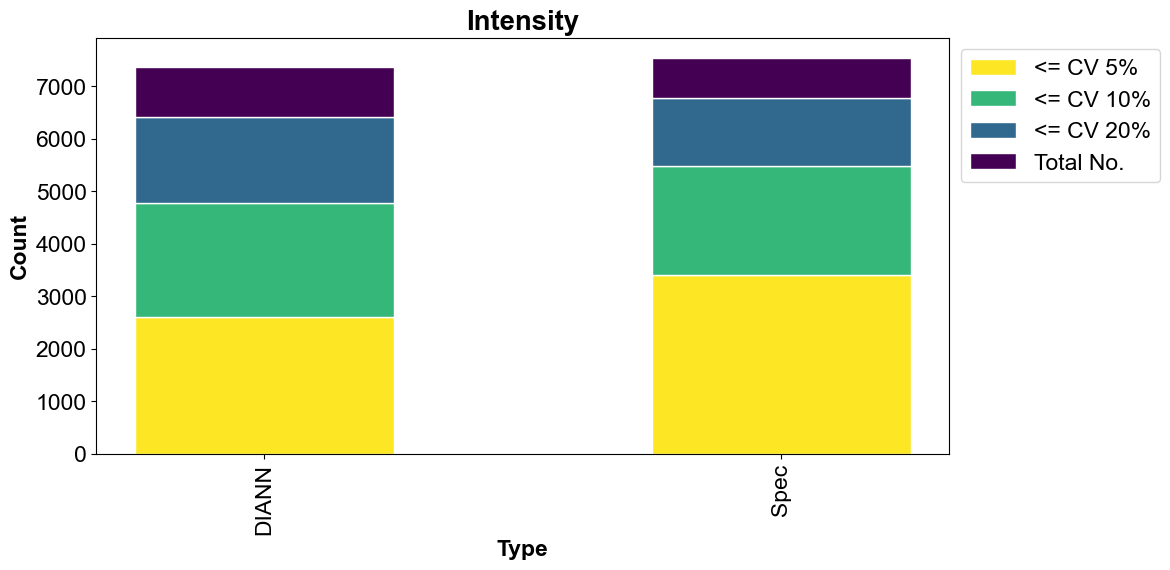

Mean IDs: [7194.5, 7343.5]


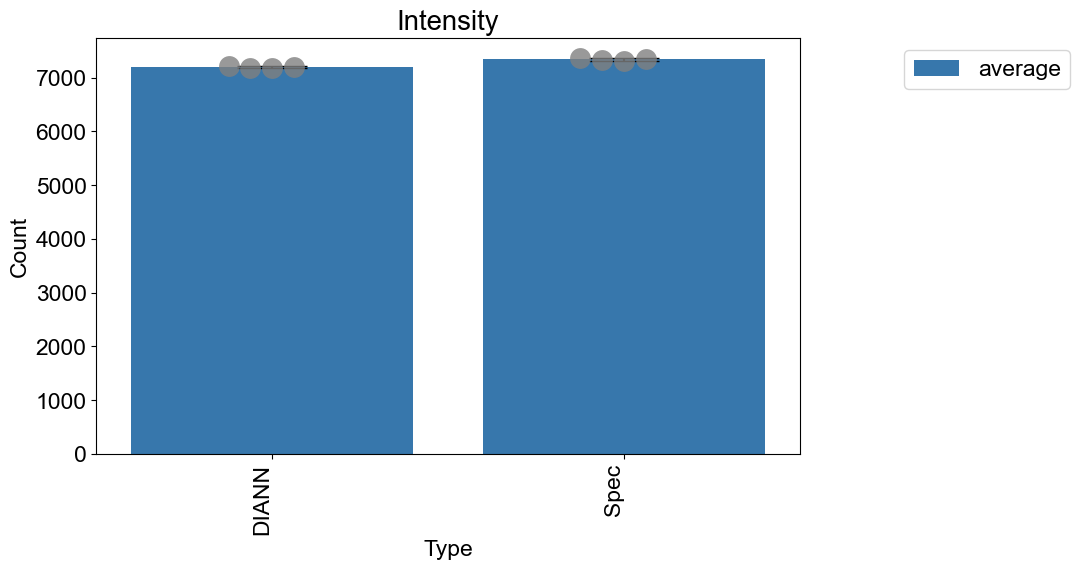

Checking data completeness levels...
Data completeness levels: [(0.25, 0.5, 0.75, 1.0), (0.25, 0.5, 0.75, 1.0)]
Creating stacked bar plot for missing values
DataCompleteness  1.00  0.75  0.50  0.25
Type                                    
DIANN             6924  7178  7303  7373
Spec              7046  7310  7474  7544


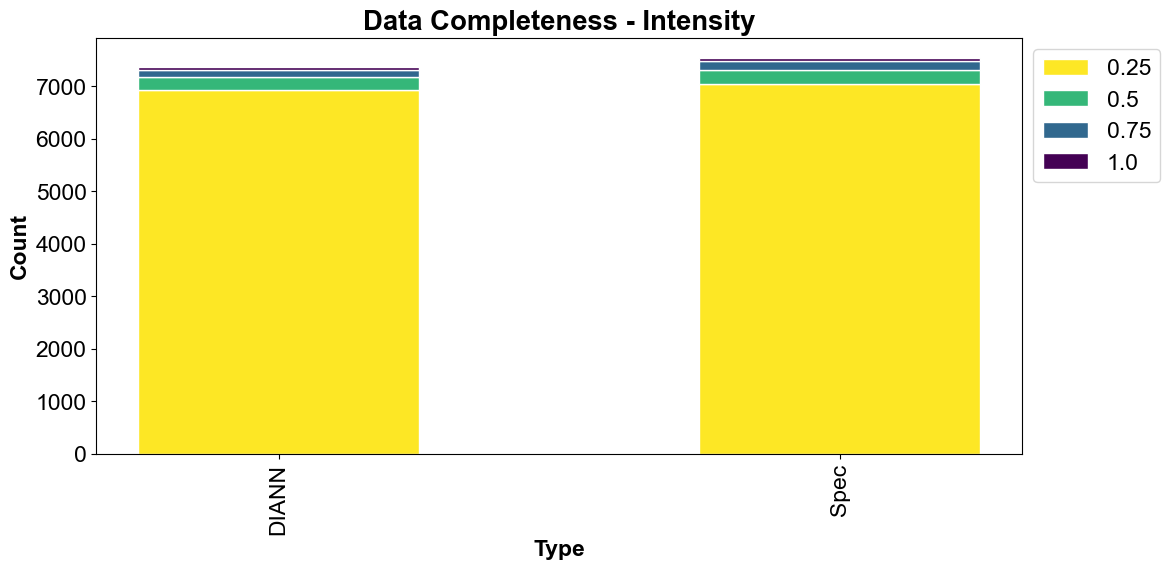

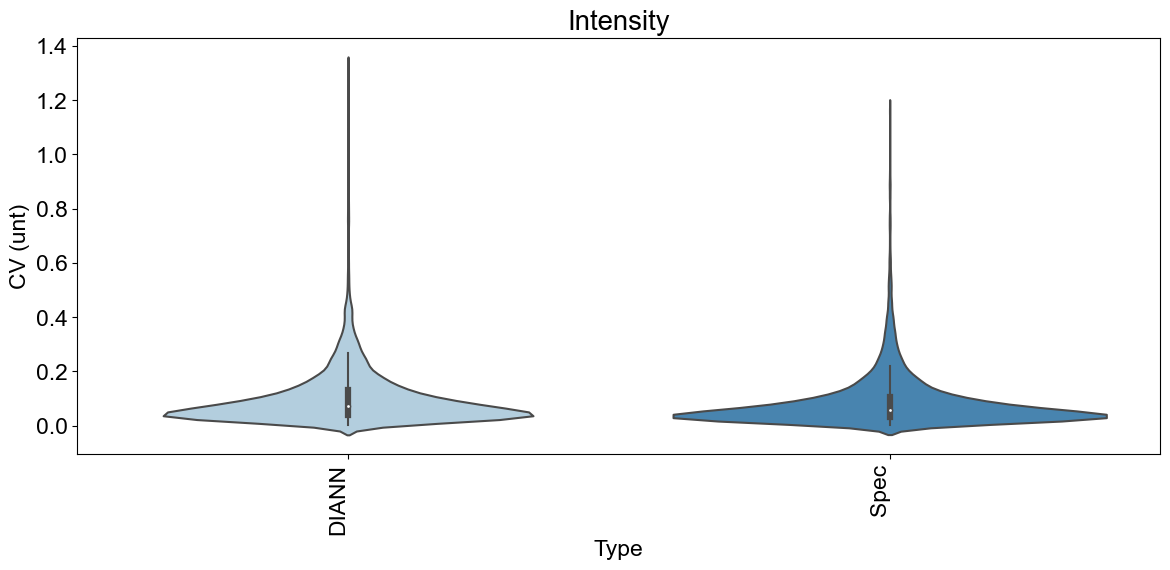

DIANN: quartile, position on the y-axis:
0.25 4.111778184193825
0.5 4.52748618619102
0.75 4.991658825025024
number of precursors per 25% of the dynamic range
[2.398597900550464, 3.475085677770571] (25%):
count: 303, ratio from total IDs: 0.04
[3.475085677770571, 4.551573454990678] (25%):
count: 3501, ratio from total IDs: 0.47
[4.551573454990678, 5.6280612322107855] (25%):
count: 3148, ratio from total IDs: 0.43
[5.6280612322107855, 6.704549009430893] (25%):
count: 420, ratio from total IDs: 0.06
Spec: quartile, position on the y-axis:
0.25 2.206841943221327
0.5 2.56810270101687
0.75 2.9902142442932993
number of precursors per 25% of the dynamic range
[0.07932563985827401, 1.2925865521052324] (25%):
count: 104, ratio from total IDs: 0.01
[1.2925865521052324, 2.5058474643521906] (25%):
count: 3330, ratio from total IDs: 0.44
[2.5058474643521906, 3.7191083765991495] (25%):
count: 3720, ratio from total IDs: 0.49
[3.7191083765991495, 4.9323692888461075] (25%):
count: 389, ratio from total

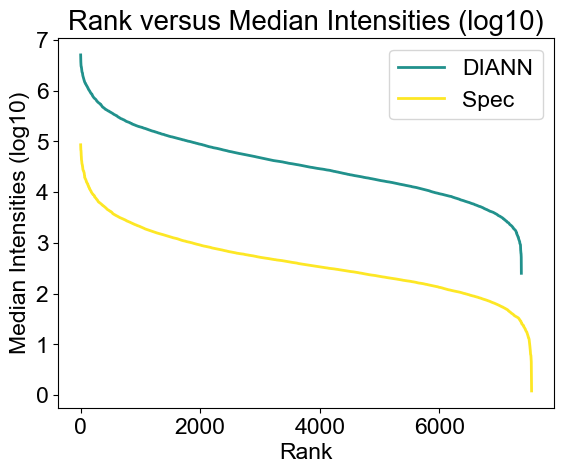

Creating Venn diagram


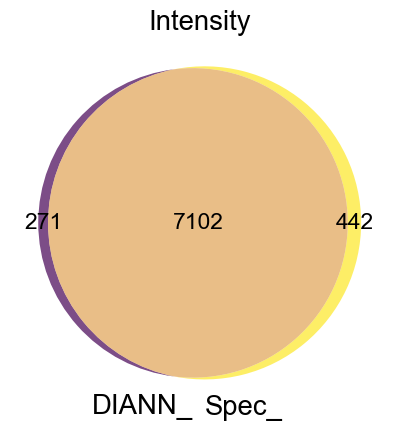

Please wait - it may take several minutes


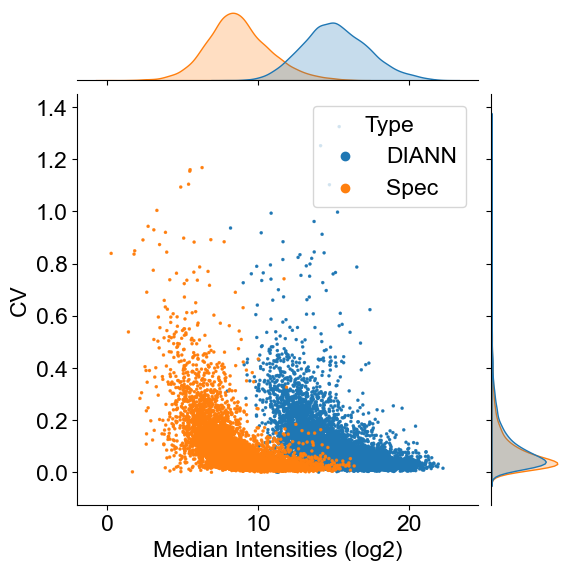

In [3]:
# import AB_tests_mutipleRuns as AB_tests
AB_tests.generate_all_plots(
    column_indicators,
    dict_results,
    labels,
    save_output_here, 
    file_type,
    file_names,
    list_dfs_only_with_intensity_columns,
    list_dfs,
    # filter_columns
)